In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
df = pd.read_csv('Train.csv')

# Show the first few rows
df.head()

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
2,tour_id62vz7e71,UNITED STATES OF AMERICA,65+,With Spouse,1.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,No,6,6,Yes,Higher Cost
3,tour_idrc76tzix,RWANDA,25-44,With Spouse and Children,3.0,1.0,Leisure and Holidays,Beach Tourism,"Radio, TV, Web",Independent,...,No,No,No,No,No,No,3,0,No,Lower Cost
4,tour_idn723m0n9,UNITED STATES OF AMERICA,45-64,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,Yes,Yes,7,0,Yes,Higher Cost


In [4]:
# Shape of the dataframe
shape = df.shape

# Column data types
data_types = df.dtypes

shape, data_types


((18506, 21),
 Tour_ID                   object
 country                   object
 age_group                 object
 travel_with               object
 total_female             float64
 total_male               float64
 purpose                   object
 main_activity             object
 info_source               object
 tour_arrangement          object
 package_transport_int     object
 package_accomodation      object
 package_food              object
 package_transport_tz      object
 package_sightseeing       object
 package_guided_tour       object
 package_insurance         object
 night_mainland             int64
 night_zanzibar             int64
 first_trip_tz             object
 cost_category             object
 dtype: object)

In [5]:
# Summary statistics
summary = df.describe(include='all')

# Check for missing values
missing_values = df.isnull().sum()

summary, missing_values

(                Tour_ID                   country age_group travel_with  \
 count             18506                     18506     18506       17431   
 unique            18506                       131         5           5   
 top     tour_id1hffseyw  UNITED STATES OF AMERICA     25-44       Alone   
 freq                  1                      2846      9047        7590   
 mean                NaN                       NaN       NaN         NaN   
 std                 NaN                       NaN       NaN         NaN   
 min                 NaN                       NaN       NaN         NaN   
 25%                 NaN                       NaN       NaN         NaN   
 50%                 NaN                       NaN       NaN         NaN   
 75%                 NaN                       NaN       NaN         NaN   
 max                 NaN                       NaN       NaN         NaN   
 
         total_female    total_male               purpose    main_activity  \
 count  

In [6]:
# Fill missing values for 'travel_with' with the mode (most common value)
df['travel_with'].fillna(df['travel_with'].mode()[0], inplace=True)

# Fill missing values for 'total_female' and 'total_male' with the median
df['total_female'].fillna(df['total_female'].median(), inplace=True)
df['total_male'].fillna(df['total_male'].median(), inplace=True)

# Check if all missing values have been filled
df.isnull().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

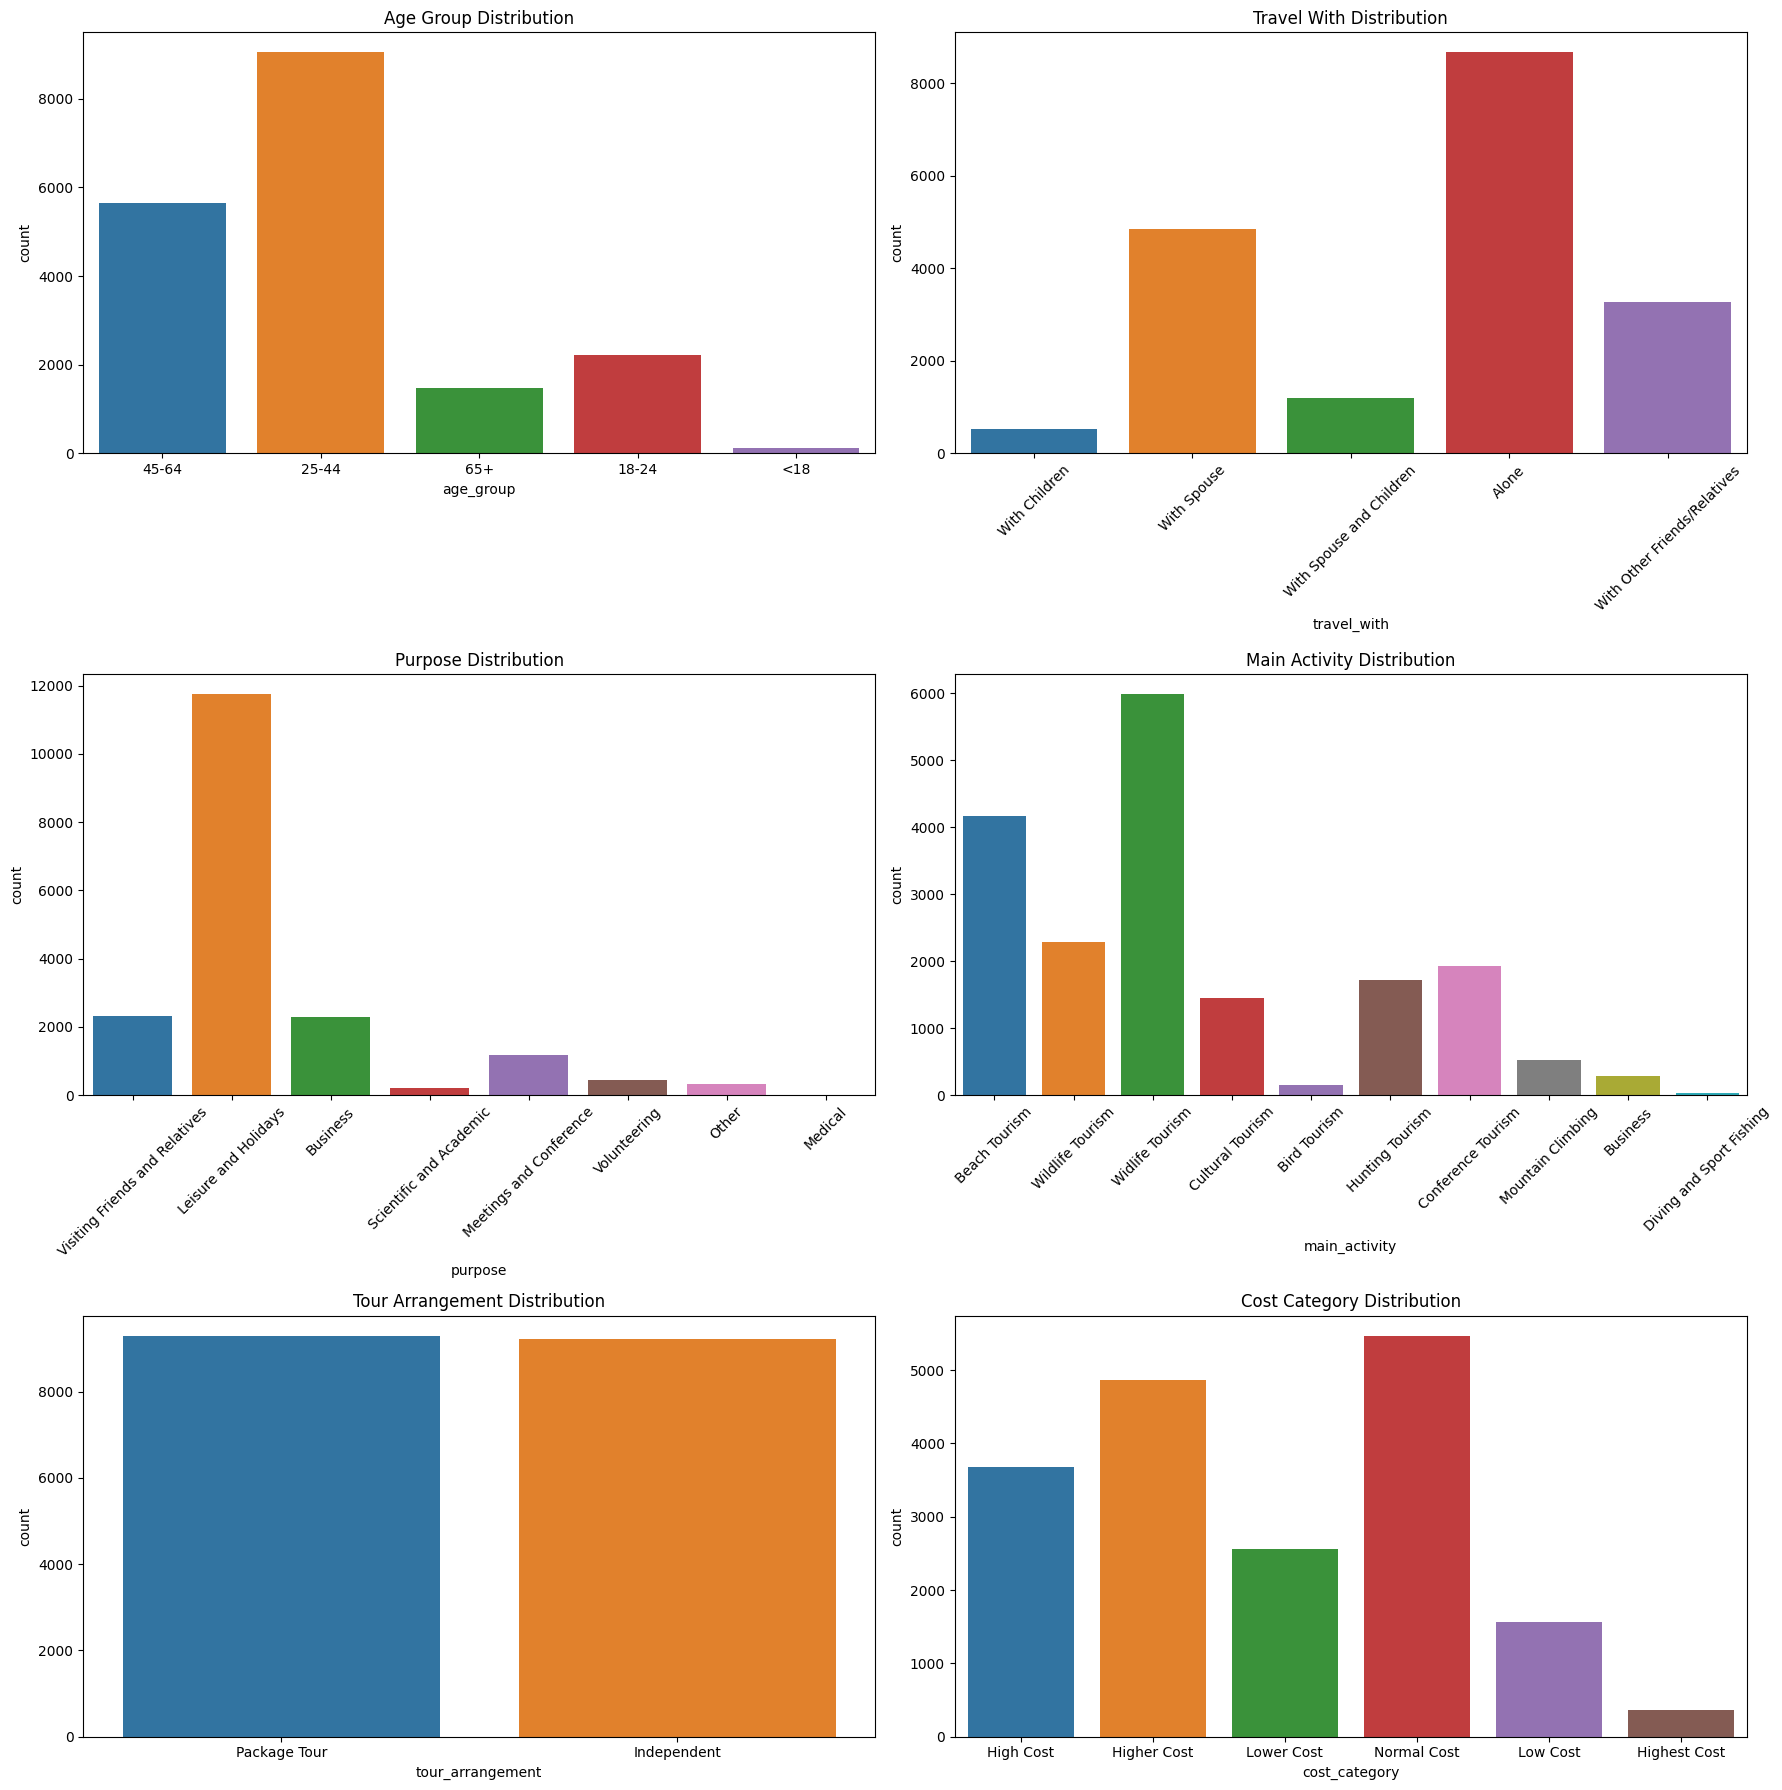

In [7]:
# Creating the figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Bar plot for 'age_group'
sns.countplot(x='age_group', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age Group Distribution')

# Bar plot for 'travel_with'
sns.countplot(x='travel_with', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Travel With Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Bar plot for 'purpose'
sns.countplot(x='purpose', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Purpose Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Bar plot for 'main_activity'
sns.countplot(x='main_activity', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Main Activity Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

# Bar plot for 'tour_arrangement'
sns.countplot(x='tour_arrangement', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Tour Arrangement Distribution')

# Bar plot for 'cost_category'
sns.countplot(x='cost_category', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Cost Category Distribution')

plt.tight_layout()
plt.show()

<Axes: >

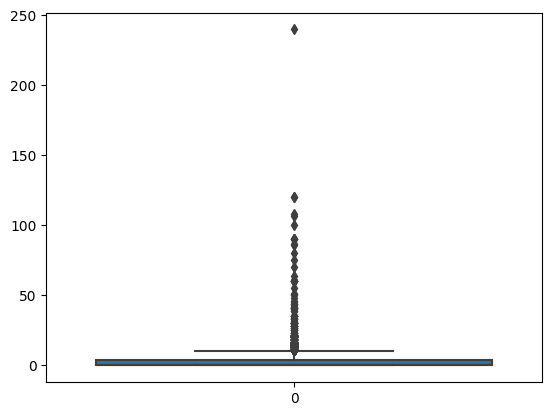

In [8]:
sns.boxplot(df.night_zanzibar)

<Axes: >

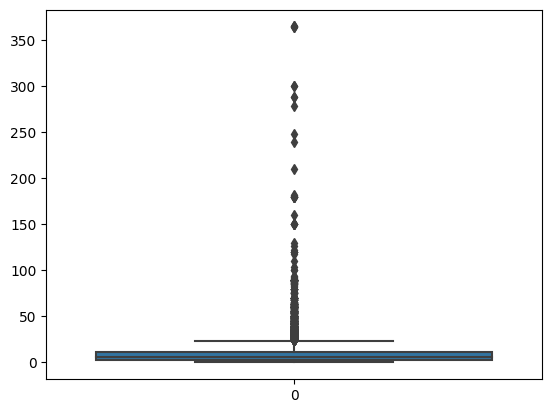

In [9]:
 sns.boxplot(df.night_mainland)

<Axes: >

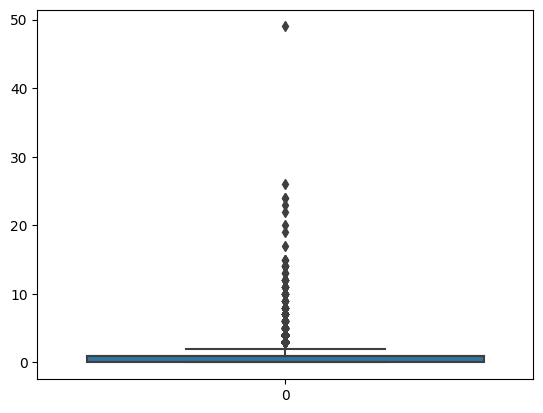

In [10]:
sns.boxplot(df.total_female)

<Axes: >

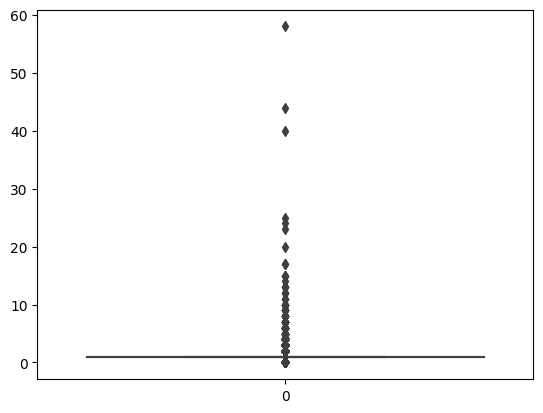

In [11]:
sns.boxplot(df.total_male)

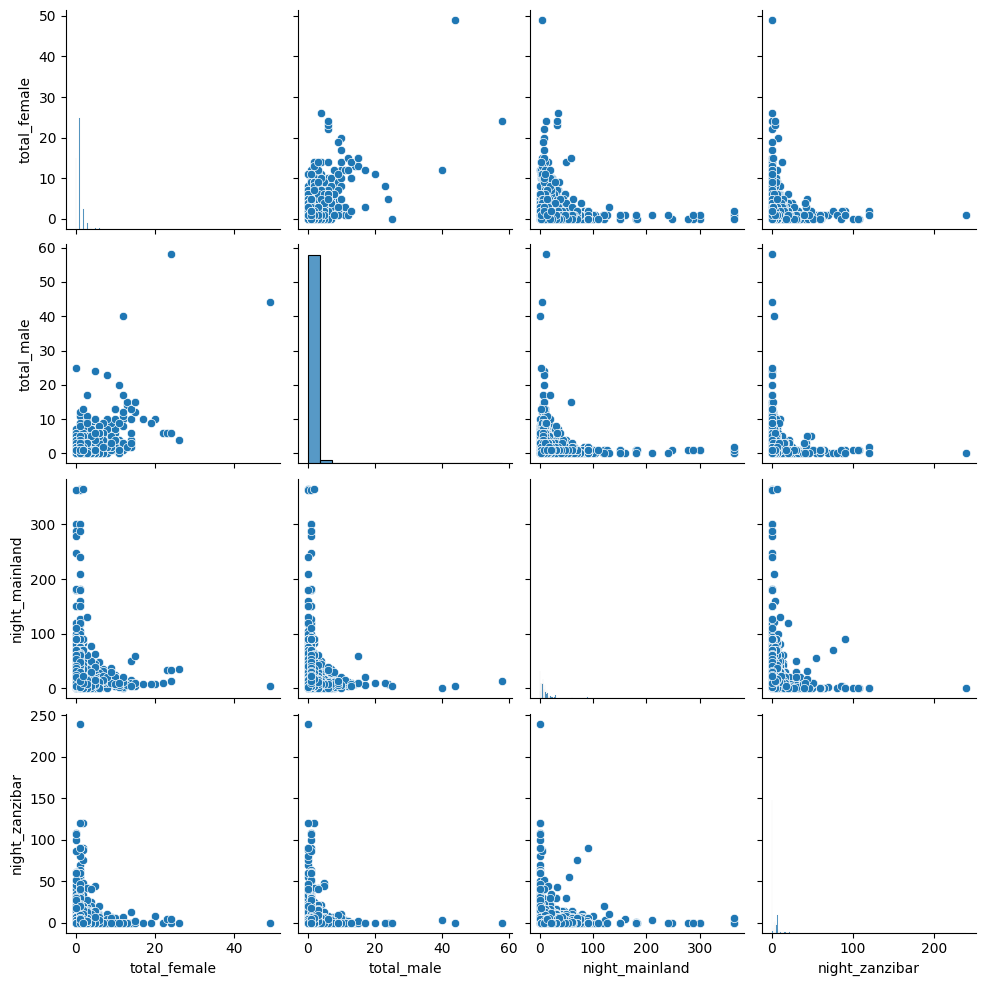

In [12]:
sns.pairplot(df)

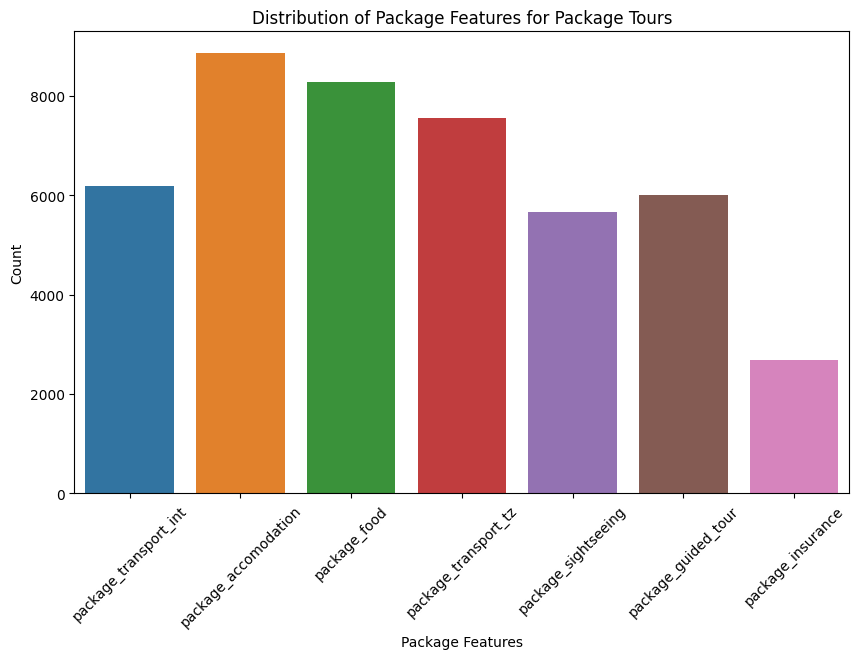

In [13]:
# Create a subset of data where 'tour_arrangement' is 'Package Tour'
package_tour_df = df[df['tour_arrangement'] == 'Package Tour']

# Select the next 7 columns after 'tour_arrangement'
package_cols = package_tour_df.columns.get_loc('tour_arrangement') + 1
package_features = package_tour_df.iloc[:, package_cols:package_cols+7]

# Count the 'Yes' for each package feature
package_counts = package_features.apply(lambda x: x.str.contains('Yes').sum())

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=package_counts.index, y=package_counts.values)
plt.title('Distribution of Package Features for Package Tours')
plt.xlabel('Package Features')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

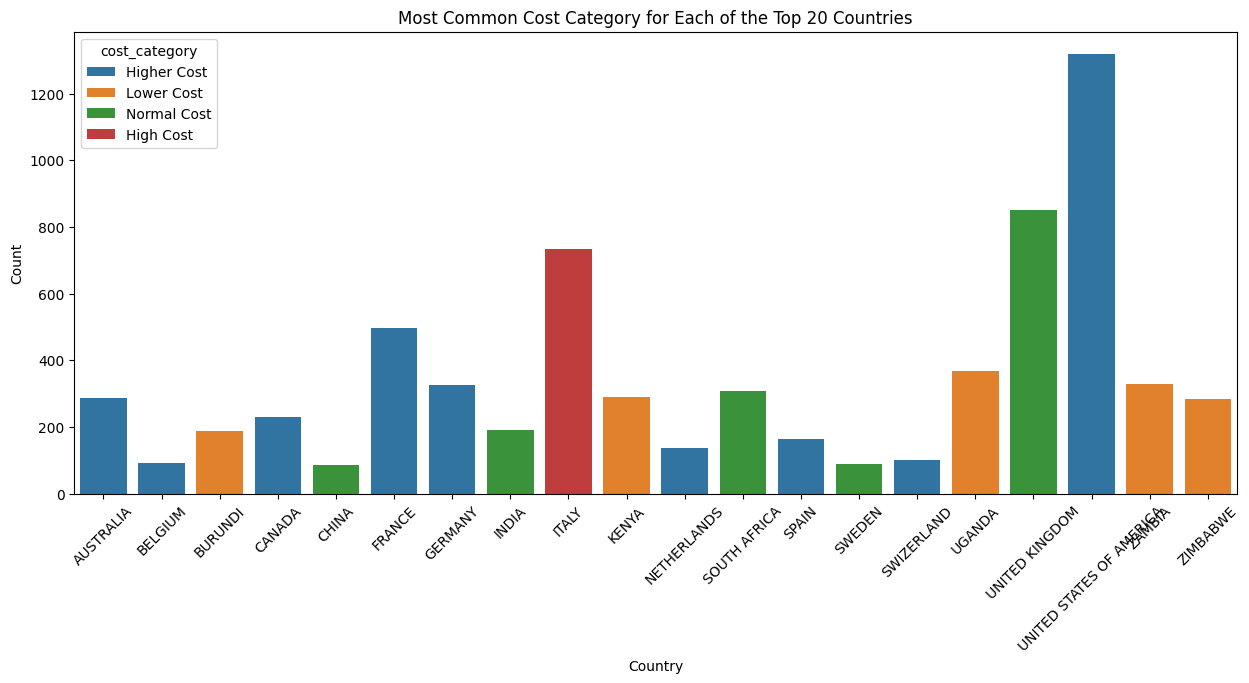

In [14]:
# Group by 'country' and 'cost_category' and count the number of 'Tour_ID'
country_cost_category = df.groupby(['country', 'cost_category'])['Tour_ID'].count().reset_index()
# Find the cost category with the maximum count for each country
idx = country_cost_category.groupby(['country'])['Tour_ID'].transform(max) == country_cost_category['Tour_ID']
max_country_cost_category = country_cost_category[idx]
# Get the top 20 countries with the most tourists
top_countries = df['country'].value_counts().nlargest(20).index
# Filter the 'max_country_cost_category' data for these top countries
top_country_cost_category = max_country_cost_category[max_country_cost_category['country'].isin(top_countries)]
# Plot the data
plt.figure(figsize=(15, 6))
sns.barplot(x='country', y='Tour_ID', hue='cost_category', data=top_country_cost_category, dodge=False)
plt.title('Most Common Cost Category for Each of the Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Group by country and find the mode of the cost category for each group
most_common_categories = df.groupby('country')['cost_category'].agg(pd.Series.mode)

# Filter for the countries where the most common category is 'lower' or 'low cost'
low_cost_countries = most_common_categories[most_common_categories.isin(['Lower Cost', 'Low Cost'])]

low_cost_countries

country
ALGERIA         Low Cost
BOTSWANA      Lower Cost
BURUNDI       Lower Cost
CAMEROON        Low Cost
CONGO         Lower Cost
DRC           Lower Cost
ESTONIA       Lower Cost
KENYA         Lower Cost
LESOTHO       Lower Cost
LIBERIA         Low Cost
MONTENEGRO      Low Cost
PERU            Low Cost
PHILIPINES      Low Cost
RWANDA        Lower Cost
UGANDA        Lower Cost
YEMEN         Lower Cost
ZAMBIA        Lower Cost
ZIMBABWE      Lower Cost
Name: cost_category, dtype: object